# Delitos vs Temperatura

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as smt

data = pd.read_csv("data/temp_vs_crime.csv")
data.head(24)

,Year,Month,MeanTemp,Crimes,MonthNum
0,2016,Enero,25.5,12422,0
1,2016,Febrero,25.8,12105,1
2,2016,Marzo,20.8,13321,2
3,2016,Abril,16.9,12807,3
4,2016,Mayo,12.3,13101,4
5,2016,Junio,10.0,12207,5
6,2016,Julio,10.6,12851,6
7,2016,Agosto,13.3,13139,7
8,2016,Septiembre,14.1,12585,8
9,2016,Octubre,17.5,13191,9


In [2]:
xticks_data = data[data["MonthNum"] == 0]
xticklabels = xticks_data["Year"]
xticks = xticks_data.index.get_level_values(0)
print(xticks)
print(xticklabels)

Index([0, 12, 24, 36, 48, 60, 72], dtype='int64')
0     2016
12    2017
24    2018
36    2019
48    2020
60    2021
72    2022
Name: Year, dtype: int64


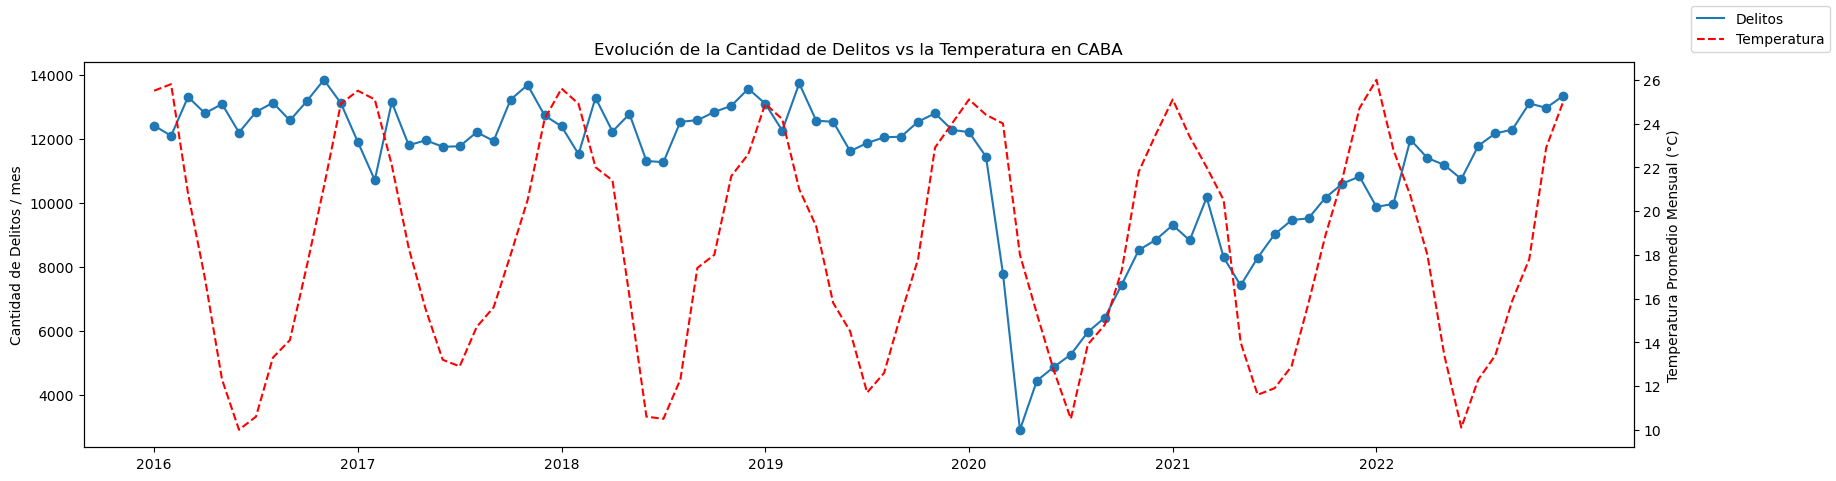

In [3]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 5)

ax1.set_title("Evolución de la Cantidad de Delitos vs la Temperatura en CABA")

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)

xs = data.index.get_level_values(0)

ax1.set_ylabel("Cantidad de Delitos / mes")
ax1.plot(xs, data["Crimes"], label="Delitos")
ax1.scatter(xs, data["Crimes"])

ax2 = ax1.twinx()
ax2.set_ylabel("Temperatura Promedio Mensual (°C)")
ax2.plot(xs, data["MeanTemp"], label="Temperatura", color="red", linestyle="--")

fig.legend()
plt.show()

- Se observa una clara caida durante los primeros meses del 2020, que coincide con el inicio de
la cuarentena (19 de Marzo de 2020).

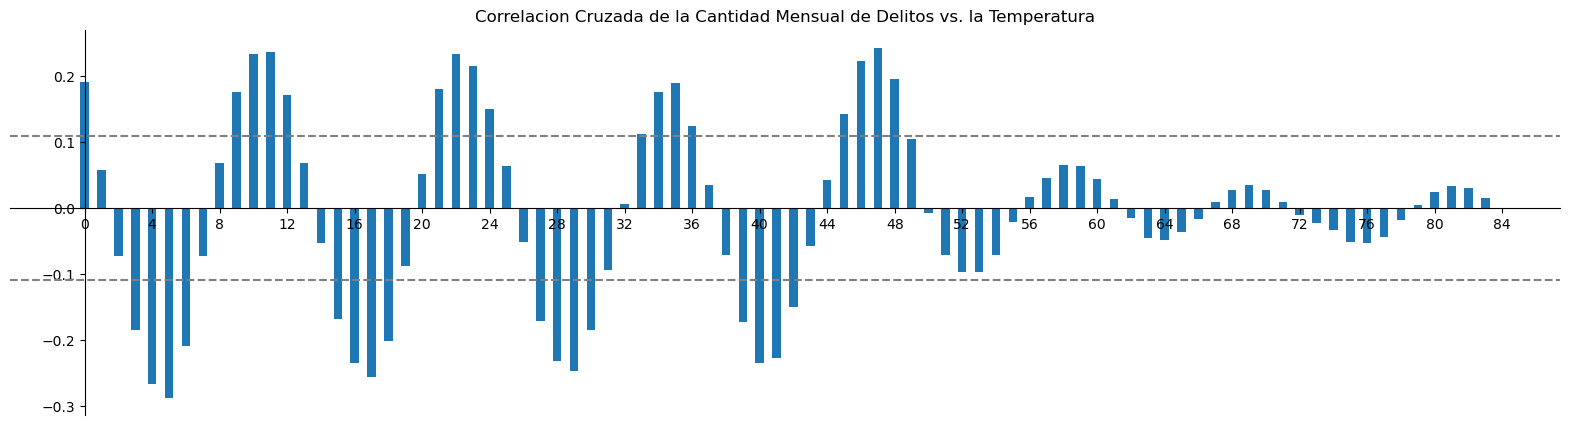

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)

ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")

ax.set_title("Correlacion Cruzada de la Cantidad Mensual de Delitos vs. la Temperatura")
ax.set_xticks(np.arange(0, 100, 4))

crimes_corr = smt.ccf(data["Crimes"], data["MeanTemp"], adjusted=False)
ax.bar(range(0, crimes_corr.size), crimes_corr, width=0.5)

ax.axhline(1 / np.sqrt(crimes_corr.size), color="gray", linestyle="--")
ax.axhline(-1 / np.sqrt(crimes_corr.size), color="gray", linestyle="--")

plt.show()

In [5]:
temps = pd.Series(data["MeanTemp"])
correlation = pd.Series(data["Crimes"]).corr(temps, method="pearson")
print("Coeficiente de Correlacion de Pearson:", correlation)

Coeficiente de Correlacion de Pearson: 0.191047640626067


Por un lado, el _coeficiente de correlacion de Pearson_ indica una *leve* correlacion positiva.

Pero por el otro, podemos observar que este resultado es afectado por el efecto producido por la cuarentena.
Este efecto se puede ver claramente en el _grafico de correlacion cruzada_, donde observa un pequeño pico en los
meses 44-48 al coincidir la tendencia a la baja de la temperatura con la caida abrupta de la criminalidad debido
al comienzo de la cuarentena.

Además, si bien se observa un pico más pronunciado durante los ultimos meses de la serie que podrian indicar una
correlacion (meses 80-84), este pico se debe a un efecto similar, ya que coinciden el aumento de las temperaturas
durante los ultimos meses de 2022 con el fin de la cuarentena y el muy pronunciado incremento de la criminalidad.

Si descartamos los meses afectados por la cuarentena del análisis, obtemeos los siguientes resultados:

0.2052745007696656


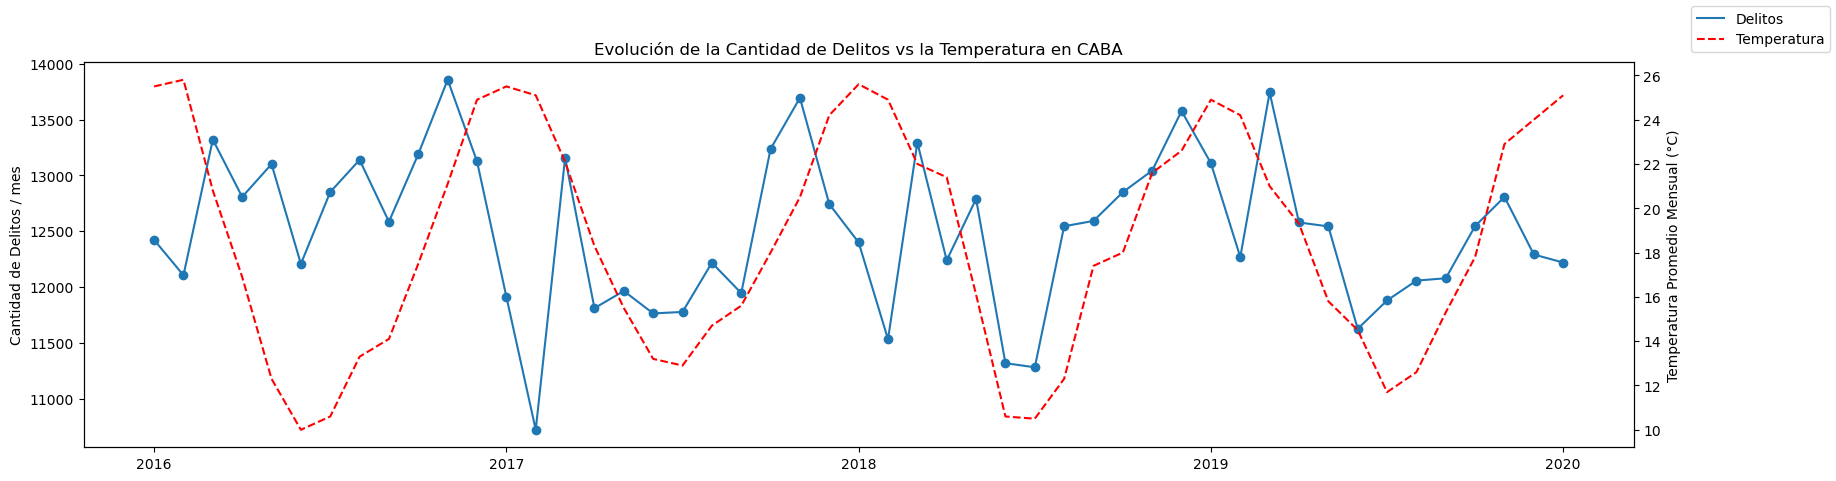

In [6]:
N = 49  # Mes inicio de la cuarentena

first_temps = pd.Series(temps[:N])
first_crimes = pd.Series(data["Crimes"][:N])
correlation = first_crimes.corr(first_temps, method="pearson")
print(correlation)

fig, ax1 = plt.subplots()
fig.set_size_inches(20, 5)

ax1.set_title("Evolución de la Cantidad de Delitos vs la Temperatura en CABA")

ax1.set_xticks(xticks[:N])
ax1.set_xticklabels(xticklabels[:N])

xs = first_crimes.index.get_level_values(0)

ax1.set_ylabel("Cantidad de Delitos / mes")
ax1.plot(xs, first_crimes, label="Delitos")
ax1.scatter(xs, first_crimes)

ax2 = ax1.twinx()
ax2.set_ylabel("Temperatura Promedio Mensual (°C)")
ax2.plot(xs, first_temps, label="Temperatura", color="red", linestyle="--")

fig.legend()
plt.show()

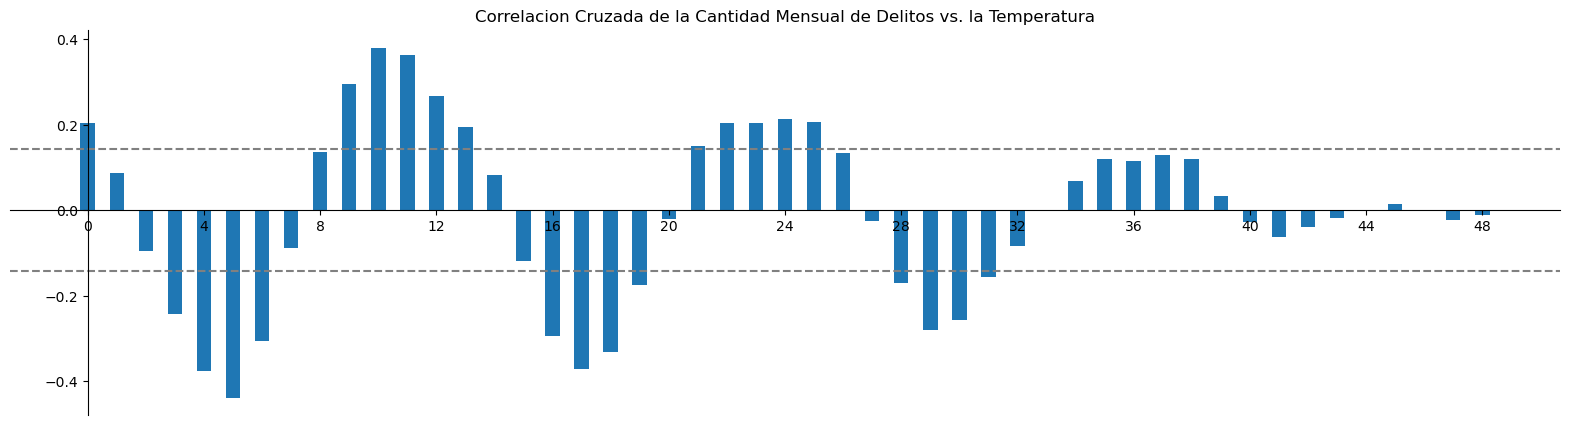

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)

ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")

ax.set_title("Correlacion Cruzada de la Cantidad Mensual de Delitos vs. la Temperatura")
ax.set_xticks(np.arange(0, 100, 4))

crimes_corr = smt.ccf(first_crimes, first_temps, adjusted=False)
ax.bar(range(0, crimes_corr.size), crimes_corr, width=0.5)

ax.axhline(1 / np.sqrt(crimes_corr.size), color="gray", linestyle="--")
ax.axhline(-1 / np.sqrt(crimes_corr.size), color="gray", linestyle="--")

plt.show()

En este caso, el grafico de correlacion cruzada no muestra picos significativos de correlacion entre
la cantidad de delitos y la temperatura.